In [2]:
########################################################################################
# Abraham Tishelman-Charny                                                             #
# 4 January 2021                                                                       #
#                                                                                      #
# The purpose of this notebook is to plot variables for different systematics trees    #
# to verify variations and scale factors make sense.                                   #
########################################################################################

##-- Uproot tutorial
# https://uproot.readthedocs.io/en/latest/basic.html

In [8]:
vals = [0, 0, 1, 2, 0]
FG = [0,0,1,1,0]
newFG = FG[vals!=0]
print(vals)
print(FG)
print(vals>0)
print(newFG)

[0, 0, 1, 2, 0]
[0, 0, 1, 1, 0]


TypeError: '>' not supported between instances of 'list' and 'int'

In [1]:
import ROOT
import os 
import sys 
from array import array
import uproot 
from matplotlib import pyplot as plt 
import numpy as np 

Welcome to JupyROOT 6.22/06


In [7]:
vals = np.array([0,1,2,3,4])
bool1 = np.array([0,1,0,1,0])
bool2 = np.array([0,1,1,0,0])
mask = np.logical_or(bool1==1, bool2==1)
print(vals[mask])
# mask = (bool1==1 and bool2==1)
# vals = vals[vals > 2]
# print(vals)

[1 2 3]


On Year 2016
On tag 0
On tag 1
On tag 2
On Year 2017
On tag 0
On tag 1
On tag 2
On Year 2018
On tag 0
On tag 1
On tag 2


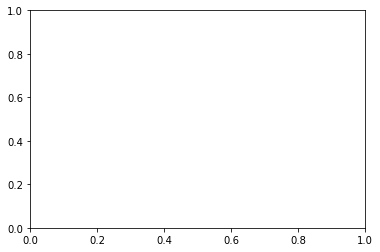

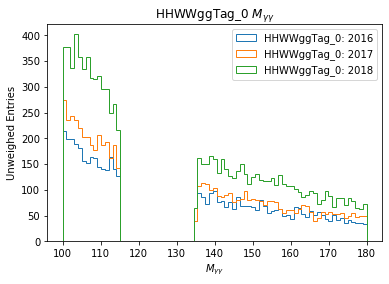

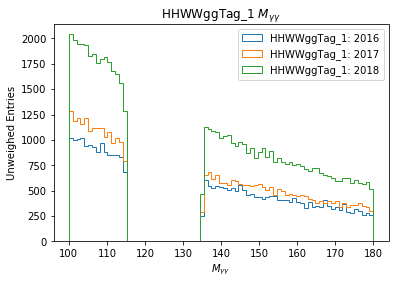

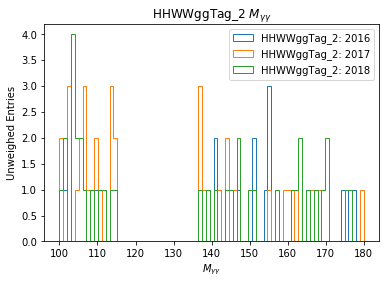

In [19]:
##-- Plot Data for three tags and three years 
##-- 2016 
path_2016 = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2016/Data_Trees/Data_2016.root'
path_2017 = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2017/Data_Trees/Data_2017.root'
path_2018 = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Data_Trees/Data_2018.root'

paths = [path_2016, path_2017, path_2018]
yearDict = {
    0 : "2016",
    1 : "2017",
    2 : "2018"
}
for i,path in enumerate(paths):
    year = yearDict[i]
    print("On Year %s"%(year))
    file = uproot.open(path)
    for tag_i in range(0,3):
        print("On tag %s"%(tag_i))
        mass_tag_i = file['tagsDumper/trees/Data_13TeV_HHWWggTag_%s'%(tag_i)]['CMS_hgg_mass'].array()
        BLIND_MASK = np.logical_or(mass_tag_i<115,mass_tag_i>135)
        mass_tag_i = mass_tag_i[BLIND_MASK]
        exec("mass_tag_%s_year_%s = mass_tag_i[:]"%(tag_i,year))

massBins = np.linspace(100,180,81)        
        
##-- Plot per tag:
for tag in ["0","1","2"]:
    fig, ax = plt.subplots()
    for year in ["2016","2017","2018"]:
        exec("vals = mass_tag_%s_year_%s"%(tag,year))
        plt.hist(vals, bins = massBins, histtype = 'step', label = "HHWWggTag_%s: %s"%(tag,year))
    
    plt.title(r"HHWWggTag_%s $M_{\gamma\gamma}$"%(tag))
    plt.xlabel(r"$M_{\gamma\gamma}$")
    plt.ylabel("Unweighed Entries")
    plt.legend()
    plt.show()
    plt.close()
        
#         plt.hist(mass_tag_i,bins=massBins,histtype='step',label='HHWWggTag_%s'%(tag_i))
#     plt.title(r"%s $M_{\gamma\gamma}$"%(year))
#     plt.xlabel(r"$M_{\gamma\gamma}$")
#     plt.ylabel('Unweighted entries')
#     plt.legend()
#     plt.show()
    

In [4]:
##-- Stack plots of single higgs backgrounds for 3 years, 3 channels 
##-- Get arrays first. 
##-- Then for each channel, make plot separate for three years to see all four backgrounds 
# direc_2016 = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2016/Single_H_hadded/"
# direc_2017 = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2017/Single_H_2017_Hadded/"
direc_2018 = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/"
# path_2016 = "/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2016/Single_H_hadded/"

# direcs = [direc_2016, direc_2017]
direcs = [direc_2018]
yearDict = {
#     0 : "2016",
#     1 : "2017",
    0 : "2018"
}

treeDict = {
    "GluGluHToGG" : "ggh_125_13TeV_HHWWggTag_TAG",
    "VBFHToGG" : "vbf_125_13TeV_HHWWggTag_TAG",
    "VHToGG" : "wzh_125_13TeV_HHWWggTag_TAG",
    "ttHJetToGG" : "tth_125_13TeV_HHWWggTag_TAG"
}
for i,direc in enumerate(direcs):
    print("direc:",direc)
    year = yearDict[i]
    print("On Year %s"%(year))    
    paths = [os.path.join(direc, file) for file in os.listdir(direc)]
    for i,path in enumerate(paths):
        print("path:",path)
        file = uproot.open(path)
                
#         print("bkg:",bkg)
        for tag_i in range(0,3):
            for key in treeDict:
                if key in path: 
                    tree = treeDict[key]
                    bkg = key[:]
                    break        
            tree = tree.replace("TAG",str(tag_i))
            print("tag_i:",tag_i)
            print("tree:",tree)
            mgg = file['tagsDumper/trees/%s'%(tree)]['CMS_hgg_mass'].array()
            SR_MASK = np.logical_and(mgg>=115,mgg<=135)       
            mgg = mgg[SR_MASK]
            weights = file['tagsDumper/trees/%s'%(tree)]['weight'].array()
            weights = weights[SR_MASK]
            exec("mgg_%s_%s_%s = mgg[:]"%(bkg,tag_i,year))
            exec("weights_%s_%s_%s = weights[:]"%(bkg,tag_i,year))
    

direc: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/
On Year 2018
path: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/GluGluHToGG_M125.root
tag_i: 0
tree: ggh_125_13TeV_HHWWggTag_0
tag_i: 1
tree: ggh_125_13TeV_HHWWggTag_1
tag_i: 2
tree: ggh_125_13TeV_HHWWggTag_2
path: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/VBFHToGG_M125.root
tag_i: 0
tree: vbf_125_13TeV_HHWWggTag_0
tag_i: 1
tree: vbf_125_13TeV_HHWWggTag_1
tag_i: 2
tree: vbf_125_13TeV_HHWWggTag_2
path: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/VHToGG_M125.root
tag_i: 0
tree: wzh_125_13TeV_HHWWggTag_0
tag_i: 1
tree: wzh_125_13TeV_HHWWggTag_1
tag_i: 2
tree: wzh_125_13TeV_HHWWggTag_2
path: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/January_2021_Production/2018/Single_H_2018_hadded/ttHJetToGG_M125.root
tag_i: 0
tree: tth_125_13TeV_HHWWggTa

LUMI 59.4


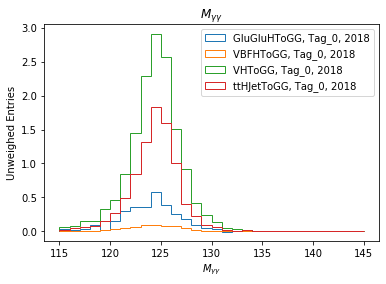

LUMI 59.4


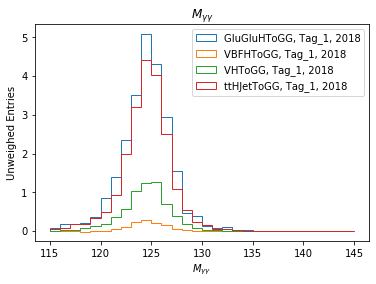

LUMI 59.4


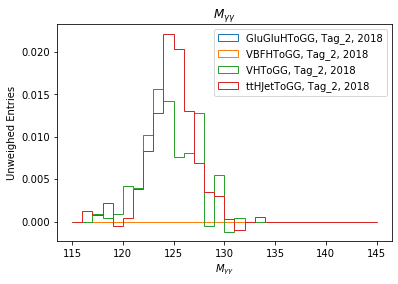

In [6]:
massBins = np.linspace(115,145,31)        
bkgs = ["GluGluHToGG","VBFHToGG","VHToGG","ttHJetToGG"]
LumiDict = {
    "2016" : 35.9,
    "2017" : 41.5,
    "2018" : 59.4
}
##-- Plot per tag:
for tag_i in ["0","1","2"]:
#     for year in ["2016","2017"]:
    for year in ["2018"]:
        LUMI = LumiDict[year]
        print("LUMI",LUMI)
        fig, ax = plt.subplots()
        for bkg in bkgs:
            exec("vals = mgg_%s_%s_%s"%(bkg,tag_i,year))
            exec("weights = weights_%s_%s_%s"%(bkg,tag_i,year))
            weights = weights*LUMI
#             vals = vals*LUMI
#             print("vals:",vals)
#             plt.hist(vals, bins = massBins, histtype = 'step', label = "%s, %s, %s"%(bkg,tag_i,year))
            plt.hist(vals, bins = massBins, weights = weights, histtype = 'step', label = "%s, Tag_%s, %s"%(bkg,tag_i,year))

        plt.title(r"$M_{\gamma\gamma}$")
        plt.xlabel(r"$M_{\gamma\gamma}$")
        plt.ylabel("Unweighed Entries")
        plt.legend()
        plt.show()
        plt.close()

In [5]:
##-- Setup Misc. Parameters
# Direc = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/GEN-Checks/'
Direc = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/'
# Direc = '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/'
# outputLoc = '/eos/user/a/atishelm/www/HHWWgg/Pre-Production-Checks/Systematics/'
outputLoc = '/eos/user/a/atishelm/www/HHWWgg/Pre-Production-Checks/GEN-Checks/'
verbose = 0

In [6]:
##-- Define Systematic Labels

phosystlabels = []
jetsystlabels = []
metsystlabels = []

##-- Granular JECs
listOfJECsources = [       "Absolute",
                           "Absolute2017",
                           "BBEC1",
                           "BBEC12017",
                           "EC2",
                           "EC22017",
                           "FlavorQCD",
                           "HF",
                           "HF2017",
                           "RelativeBal",
                           "RelativeSample2017"
                    ]
    
phosystlabels.append("MvaShift")
phosystlabels.append("SigmaEOverEShift")
phosystlabels.append("MaterialCentralBarrel")
phosystlabels.append("MaterialOuterBarrel")
phosystlabels.append("MaterialForward")
phosystlabels.append("FNUFEB")
phosystlabels.append("FNUFEE")
phosystlabels.append("MCScaleGain6EB")
phosystlabels.append("MCScaleGain1EB")
jetsystlabels.append("JEC")
jetsystlabels.append("JER")
jetsystlabels.append("PUJIDShift")
for sourceName in listOfJECsources:
    jetsystlabels.append("JEC%s" % (str(sourceName)))
metsystlabels.append("metJecUncertainty")
metsystlabels.append("metJerUncertainty")
metsystlabels.append("metPhoUncertainty")
metsystlabels.append("metUncUncertainty")

for r9 in ["HighR9","LowR9"]:
    for region in ["EB","EE"]:
        phosystlabels.append("ShowerShape%s%s"%(r9,region))
        phosystlabels.append("MCScale%s%s" % (r9,region))
        for var in ["Rho","Phi"]:
            phosystlabels.append("MCSmear%s%s%s" % (r9,region,var))    

if(verbose):
    print("--------------------------")
    print("Photon Systematics Labels:")
    for phosystlabel in phosystlabels:
        print(phosystlabel)
    print("--------------------------")
    print("Jet Systematics Labels:")
    for jetsystlabel in jetsystlabels:
        print(jetsystlabel)
    print("--------------------------")
    print("MET Systematics Labels:")
    for metsystlabel in metsystlabels:
        print(metsystlabel)    
    print("--------------------------")    

print("Number of Photon Systematics Labels:",len(phosystlabels))
print("Number of Jet Systematics Labels:",len(jetsystlabels))
print("Number of MET Systematics Labels:",len(metsystlabels))

allSystLabels = []
for phosyst in phosystlabels:
    allSystLabels.append(phosyst)
for jetsyst in jetsystlabels:
    allSystLabels.append(jetsyst)
for metsyst in metsystlabels:
    allSystLabels.append(metsyst)

print("Number of Systematic Labels:",len(allSystLabels))

Number of Photon Systematics Labels: 25
Number of Jet Systematics Labels: 14
Number of MET Systematics Labels: 4
Number of Systematic Labels: 43


In [7]:
# ScaleFactors = [
#     "LooseMvaSF", ##-- Doesn't match AN-19-149. 0 uncertainty in 17, 18 
#     "PreselSF", ##-- identical for 2017, 2018. 16' different. 
#     "electronVetoSF",
#     "TriggerWeight",
# #     "FracRVWeight", ##-- Not used for HH->WWgg 
#     "MuonIDWeight",
#     "ElectronIDWeight",
#     "ElectronRecoWeight",
#     "MuonIsoWeight",
#     "JetBTagCutWeight",
#     "JetBTagReshapeWeight",
#     "prefireWeight"
# ]

ScaleFactors = [
#     "LooseMvaSF", ##-- Doesn't match AN-19-149. 0 uncertainty in 17, 18 
    "PreselSF", ##-- identical for 2017, 2018. 16' different. 
    "electronVetoSF",
    "TriggerWeight",
    "prefireWeight"
]

In [10]:
files = [os.path.join(Direc, file) for file in os.listdir(Direc)]
print("files:",files)
for file in files:
    print("file:",file) 
    file_uproot = uproot.open(file)
#     if("FL" not in file): continue 
    channelDict = {
        ##-- Local
#         "SL" : ["SL","tagsDumper/trees/GluGluToHHTo2G2Qlnu_node_cHHH1_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_0"],
#         "FH" : ["FH","tagsDumper/trees/GluGluToHHTo2G4Q_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_1"],
#         "FL" : ["FL","tagsDumper/trees/GluGluToHHTo2G2l2nu_node_cHHH1_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_2"]
        
        ##-- fggrunjobs
        "SL" : ["SL","tagsDumper/trees/GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_0"],
        "FH" : ["FH","tagsDumper/trees/GluGluToHHTo2G4Q_node_cHHH1_13TeV_HHWWggTag_1"],
        "FL" : ["FL","tagsDumper/trees/GluGluToHHTo2G2l2nu_node_cHHH1_13TeV_HHWWggTag_2"]
    }
    
    for key in channelDict:
        if(key in file):
            channel, NominalTreename = channelDict[key]
            
    centralObjectWeight_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()
    Nentries = len(centralObjectWeight_vals)
    print("channel:",channel)
    print("NominalTreename:",NominalTreename)
    print("Number of entries:",Nentries)

    ##-- Plot centralObjectWeight and product of Central Weights
#     xmin, xmax, xbins = 0.75,1.25,100
    xmin, xmax, xbins = 0.8,1.2,101
    bins = np.linspace(xmin, xmax, xbins + 1) ##-- xbins + 1 for proper number of boundaries in linear space      
#     Central_bins = np.linspace(0,1.5,151)
#     Central_bins = np.linspace(0.8,1.2,41)

    
    ##-- Plot each scale factor's up/down relative to COW 
    for i,ScaleFactor in enumerate(ScaleFactors):
        print("===>",ScaleFactor)
        SF_Central_Label = "%sCentral"%(ScaleFactor)
        
        CentralObjectWeight_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()
#         SF_Central = "%sCentral"%(ScaleFactor)
        SF_Up = "%sUp01sigma"%(ScaleFactor)
        SF_Down = "%sDown01sigma"%(ScaleFactor)      
#         SF_Central_vals = file_uproot[NominalTreename][SF_Central].array()
        SF_Up_vals = file_uproot[NominalTreename][SF_Up].array()
        SF_Down_vals = file_uproot[NominalTreename][SF_Down].array()      
        SF_Up_vals = SF_Up_vals / CentralObjectWeight_vals
        SF_Down_vals = SF_Down_vals / CentralObjectWeight_vals
#         SF_Central_vals = SF_Central_vals / CentralObjectWeight_vals
        
        fig, ax = plt.subplots()
        
#         plt.hist(SF_Central_vals,
#                  bins = bins,
#                  histtype = 'step',
#                  label = "Central"
#                 )

        plt.hist(SF_Up_vals,
                 bins = bins,
                 histtype = 'step',
                 label = "UP rel. to central"
                )
        plt.hist(SF_Down_vals,
                 bins = bins,
                 histtype = 'step',
                 label = "DOWN rel. to central"
                )  
        
        ax.set_title("%s: %s"%(channel, ScaleFactor))
        ax.set_xlabel(ScaleFactor)
        ax.set_ylabel("Entries")
        plt.legend()
        plt.savefig("%s/%s/ScaleFactors/%s.png"%(outputLoc,channel,ScaleFactor))
        plt.close()  
        
    
#     ##-- Plot Central Object Weight
#     SF_Central_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()
#     print("COW mean:",SF_Central_vals.mean())
# #     print("central object weight mean:",np.mean(SF_Central_vals.array()))
#     fig, ax = plt.subplots()
#     plt.hist(SF_Central_vals,
#              bins = Central_bins,
#              histtype = 'step',
#              label = "centralObjectWeight"
#             )
#     ax.set_title("%s: %s"%(channel, "centralObjectWeight"))
#     ax.set_xlabel("centralObjectWeight")
#     ax.set_ylabel("Entries")
#     plt.legend()
#     plt.yscale('log')
#     plt.savefig("%s/%s/ScaleFactors/%s.png"%(outputLoc,channel,"centralObjectWeight"))
#     plt.close()          
        
        
#     CentralObjectWeight_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()         
    
# #         SF_Central = file_uproot[NominalTreename][SF_Central_Label].array()
# # #         print("SF_Product:",SF_Product)
# #         print(SF_Central)
# # #         SF_Product = SF_Product * SF_Central
        
# # #     print("SF_Product:",SF_Product)
# #     print("centralObjectWeight:",centralObjectWeight_vals)
# #     print("Difference:",SF_Product - centralObjectWeight_vals)
    
# #     ##-- Plot Scale Factors in nominal tree
# # #     xmin, xmax, xbins = 0.25, 1.75, 40
# # #     bins = np.linspace(xmin, xmax, xbins + 1) ##-- xbins + 1 for proper number of boundaries in linear space   
# #     for ScaleFactor in ScaleFactors:
# #         print("On SF:",ScaleFactor)
# #         SF_Central = "%sCentral"%(ScaleFactor)
# #         SF_Up = "%sUp01sigma"%(ScaleFactor)
# #         SF_Down = "%sDown01sigma"%(ScaleFactor)
        
# #         SF_Central_vals = file_uproot[NominalTreename][SF_Central].array()
# #         SF_Up_vals = file_uproot[NominalTreename][SF_Up].array()
# #         SF_Down_vals = file_uproot[NominalTreename][SF_Down].array()
        
# #         fig, ax = plt.subplots()
# #         plt.hist(SF_Central_vals,
# #                  bins = bins,
# #                  histtype = 'step',
# #                  label = "CENTRAL"
# #                 )
# #         plt.hist(SF_Up_vals,
# #                  bins = bins,
# #                  histtype = 'step',
# #                  label = "UP"
# #                 )
# #         plt.hist(SF_Down_vals,
# #                  bins = bins,
# #                  histtype = 'step',
# #                  label = "DOWN"
# #                 )  
        
# #         ax.set_title("%s: %s"%(channel, ScaleFactor))
# #         ax.set_xlabel(ScaleFactor)
# #         ax.set_ylabel("Entries")
# #         plt.legend()
# #         plt.savefig("%s/%s/ScaleFactors/%s.png"%(outputLoc,channel,ScaleFactor))
# #         plt.close()


files: ['/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/FH-10kEvents.root', '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/FL-10kEvents.root', '/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/SL-10kEvents.root']
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/FH-10kEvents.root
channel: FH
NominalTreename: tagsDumper/trees/GluGluToHHTo2G4Q_node_cHHH1_13TeV_HHWWggTag_1
Number of entries: 2166
===> PreselSF
===> electronVetoSF
===> TriggerWeight
===> prefireWeight
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/FinalFinalChecks/hadded/FL-10kEvents.root
channel: FL
NominalTreename: tagsDumper/trees/GluGluToHHTo2G2l2nu_node_cHHH1_13TeV_HHWWggTag_2
Number of entries: 780
===> PreselSF
===> electronVetoSF
===> TriggerWeight
===> prefireWeight
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre

In [38]:
files = [os.path.join(Direc, file) for file in os.listdir(Direc)]
print("files:",files)
for file in files:
    print("file:",file) 
    file_uproot = uproot.open(file)
    channelDict = {
        ##-- Local
        "SL" : ["SL","tagsDumper/trees/GluGluToHHTo2G2Qlnu_node_cHHH1_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_0"],
        "FH" : ["FH","tagsDumper/trees/GluGluToHHTo2G4Q_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_1"],
        "FL" : ["FL","tagsDumper/trees/GluGluToHHTo2G2l2nu_node_cHHH1_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_2"]
        
        ##-- fggrunjobs
#         "SL" : ["SL","tagsDumper/trees/GluGluToHHTo2G2Qlnu_node_cHHH1_13TeV_HHWWggTag_0"],
#         "FH" : ["FH","tagsDumper/trees/GluGluToHHTo2G4Q_node_cHHH1_13TeV_HHWWggTag_1"],
#         "FL" : ["FL","tagsDumper/trees/GluGluToHHTo2G2l2nu_node_cHHH1_13TeV_HHWWggTag_2"]
    }
    
    for key in channelDict:
        if(key in file):
            channel, NominalTreename = channelDict[key]
            
    centralObjectWeight_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()
    Nentries = len(centralObjectWeight_vals)
    print("channel:",channel)
    print("NominalTreename:",NominalTreename)
    print("Number of entries:",Nentries)

    ##-- Plot centralObjectWeight and product of Central Weights
    xmin, xmax, xbins = 0.75,1.25,100
    bins = np.linspace(xmin, xmax, xbins + 1) ##-- xbins + 1 for proper number of boundaries in linear space      
    Central_bins = np.linspace(0.5,1.25,101)
    
    
    CommonGenObjs = ["HiggsBosons", "WBosons","Photons"]
    kinVars = ["pt","eta","phi","E","M"]
    orderTitleDict = {
        0: "Leading",
        1: "Subleading"
    }
    particleNamesDict = {
        "HiggsBosons" : "Higgs",
        "WBosons" : "W",
        "Photons" : "Photon"
    }        

    for CommonGenObj in CommonGenObjs:
        for kinVar in kinVars:
            for i in range(2): # leading, subleading
                placement = orderTitleDict[i]
                particle = particleNamesDict[CommonGenObj]
                varTitle = "%s_GEN_%s_%s"%(placement,particle,kinVar)
                GEN_var = file_uproot[NominalTreename][varTitle].array()
    
                print("==>",varTitle)
                fig, ax = plt.subplots()
                plt.hist(GEN_var,
#                          bins = bins,
                         histtype = 'step'
#                          label = ""
                        )

                ax.set_title("%s: %s"%(channel, varTitle))
                ax.set_xlabel(varTitle)
                ax.set_ylabel("Entries [A.U.]")
#                 plt.legend()
                plt.savefig("%s/%s/%s.png"%(outputLoc,channel,varTitle))
                plt.close()      
        
    ##-- Gen Quarks, Leptons, Neutrinos 
    GenObjsInfo = [["Quarks","Quark",4],["Leptons","Lepton",2],["Neutrinos","Neutrino",2]] ##-- particle and number to check for. Max depends on WWgg final state 

    for GenObjInfo in GenObjsInfo:
        VectorName, Particle, maxToCheck = GenObjInfo[0], GenObjInfo[1], GenObjInfo[2]
        for i in range(maxToCheck):
            for kinVar in kinVars:
                varTitle = "GEN_%s_%s_%s"%(Particle,i,kinVar)
                GEN_var = file_uproot[NominalTreename][varTitle].array()
                print("==>",varTitle)
                fig, ax = plt.subplots()
                plt.hist(GEN_var,
                         histtype = 'step'
                        )
                ax.set_title("%s: %s"%(channel, varTitle))
                ax.set_xlabel(varTitle)
                ax.set_ylabel("Entries [A.U.]")
                plt.savefig("%s/%s/%s.png"%(outputLoc,channel,varTitle))
                plt.close()                  
                
            varTitle = "GEN_%s_%s_pdgId"%(Particle,i)
            GEN_var = file_uproot[NominalTreename][varTitle].array()
            print("==>",varTitle)
            fig, ax = plt.subplots()
            plt.hist(GEN_var,
                     histtype = 'step'
                    )
            ax.set_title("%s: %s"%(channel, varTitle))
            ax.set_xlabel(varTitle)
            ax.set_ylabel("Entries [A.U.]")
            plt.savefig("%s/%s/%s.png"%(outputLoc,channel,varTitle))
            plt.close()              
    
    

files: ['/eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/GEN-Checks/SL-500Evts.root']
file: /eos/user/a/atishelm/ntuples/HHWWgg_flashgg/Pre-Production-Checks/GEN-Checks/SL-500Evts.root
channel: SL
NominalTreename: tagsDumper/trees/GluGluToHHTo2G2Qlnu_node_cHHH1_TuneCP5_PSWeights_13TeV_powheg_pythia8_13TeV_HHWWggTag_0
Number of entries: 98
==> Leading_GEN_Higgs_pt
==> Subleading_GEN_Higgs_pt
==> Leading_GEN_Higgs_eta
==> Subleading_GEN_Higgs_eta
==> Leading_GEN_Higgs_phi
==> Subleading_GEN_Higgs_phi
==> Leading_GEN_Higgs_E
==> Subleading_GEN_Higgs_E
==> Leading_GEN_Higgs_M
==> Subleading_GEN_Higgs_M
==> Leading_GEN_W_pt
==> Subleading_GEN_W_pt
==> Leading_GEN_W_eta
==> Subleading_GEN_W_eta
==> Leading_GEN_W_phi
==> Subleading_GEN_W_phi
==> Leading_GEN_W_E
==> Subleading_GEN_W_E
==> Leading_GEN_W_M
==> Subleading_GEN_W_M
==> Leading_GEN_Photon_pt
==> Subleading_GEN_Photon_pt
==> Leading_GEN_Photon_eta
==> Subleading_GEN_Photon_eta
==> Leading_GEN_Photon_phi
==> Subleadi

In [ ]:
##-- Theory Uncertainties - Not used for HHWWgg

for THU_i,THU in enumerate(TheoryUncertainties):
    print("===>",THU)
    Label = "%sCentral"%(THU)

#         CentralObjectWeight_vals = file_uproot[NominalTreename]["centralObjectWeight"].array()
#         SF_Central = "%sCentral"%(ScaleFactor)
    THU_Up = "%sUp01sigma"%(THU)
    THU_Down = "%sDown01sigma"%(THU)      
#         SF_Central_vals = file_uproot[NominalTreename][SF_Central].array()
    THU_up = file_uproot[NominalTreename][THU_Up].array()
    THU_down = file_uproot[NominalTreename][THU_Down].array()   

    THU_up = THU_up / CentralObjectWeight_vals
    THU_down = THU_down / CentralObjectWeight_vals

#         SF_Up_vals = SF_Up_vals / CentralObjectWeight_vals
#         SF_Down_vals = SF_Down_vals / CentralObjectWeight_vals

#         SF_Central_vals = SF_Central_vals / CentralObjectWeight_vals

    fig, ax = plt.subplots()

#         plt.hist(THU_up,
#                  bins = bins,
#                  histtype = 'step',
#                  label = "Central"
#                 )

    plt.hist(THU_up,
             bins = bins,
             histtype = 'step',
             label = "UP"
            )
    plt.hist(THU_down,
             bins = bins,
             histtype = 'step',
             label = "DOWN"
            )  

    ax.set_title("%s: %s"%(channel, THU))
    ax.set_xlabel(ScaleFactor)
    ax.set_ylabel("Entries")
    plt.legend()
    plt.savefig("%s/%s/ScaleFactors/%s.png"%(outputLoc,channel,THU))
    plt.close()  